In [3]:
import numpy as np
import csv
import time
import matplotlib.pyplot as plt

csv_filename = 'digits.csv'
with open(csv_filename) as f:
    reader = csv.reader(f)
    lst = list(reader)

In [4]:
array = np.array(lst)
print(array)

[['label' '0x0' '0x1' ... '13x11' '13x12' '13x13']
 ['7' '0' '0' ... '0' '0' '0']
 ['3' '0' '0' ... '0' '0' '0']
 ...
 ['7' '0' '0' ... '0' '0' '0']
 ['2' '0' '0' ... '0' '0' '0']
 ['5' '0' '0' ... '0' '0' '0']]


In [5]:
array1 = np.delete(array, 0, axis=0)
print(array1)

[['7' '0' '0' ... '0' '0' '0']
 ['3' '0' '0' ... '0' '0' '0']
 ['8' '0' '0' ... '0' '0' '0']
 ...
 ['7' '0' '0' ... '0' '0' '0']
 ['2' '0' '0' ... '0' '0' '0']
 ['5' '0' '0' ... '0' '0' '0']]


In [6]:
num_row = np.size(array1, axis = 0)
num_colomn = np.size(array1, axis = 1)
print(num_row, num_colomn)

6000 197


In [7]:
arr_img = np.delete(array1, 0, axis = 1)
print(arr_img)

[['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']]


In [8]:
#labels
label = array1[:, 0]
print(label)

['7' '3' '8' ... '7' '2' '5']


In [9]:
X = arr_img.astype(np.int64)
y = label.astype(np.int64)
print(X, y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [7 3 8 ... 7 2 5]


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaler.fit(X)
X = scaler.fit_transform(X)
print(X)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
def train_fuc(num_hidden_layer, num_nodes, act_func):
    max_itr = 1000
    solver = 'ibfgs'
    t_hls = np.zeros(num_hidden_layer).astype(np.int64)
    i = 0
    while i < num_hidden_layer:
        t_hls[i-1] = num_nodes
        i += 1
    t_hls = tuple(t_hls)
    start = time.time()
    mlp = MLPClassifier (
        hidden_layer_sizes=t_hls,
        activation = act_func,
        max_iter = max_itr        
    )
    mlp.fit(X_train, y_train)
    time_sent=time.time()-start    
    # print(mlp.predict(X_test[120].reshape(1, -1)))
    # # print("Training set score: %f" % mlp.score(X_train, y_train))
    # # print("Test set score: %f" % mlp.score(X_test, y_test))
    y_true = y_test
    y_pred = np.zeros(np.size(y_test, 0))
    k = 0;
    while k < np.size(y_pred):
        y_pred[k] = mlp.predict(X_test[k].reshape(1, -1))    
    
    prfs = precision_recall_fscore_support(y_true, y_pred, average='macro')
    
    
    return time_sent, prfs
    

In [13]:
# t = train_fuc(2, 20, 'relu')
# print(t)

nodes = [20, 40 ,60 ,80 ,100]
time_consum_relu = np.zeros(5)
time_consum_tanh = np.zeros(5)
prfs1 = np.zeros(5)
prfs2 = np.zeros(5)
index = 0
for node in nodes:
    time_consum_relu[index], prfs1[index] = train_fuc(2, node, 'relu')
    time_consum_tanh[index], prfs2[index] = train_fuc(2, node, 'tanh')
    index += 1




In [ ]:
print("prfs1" + prfs1)
print("prfs2" + prfs2)

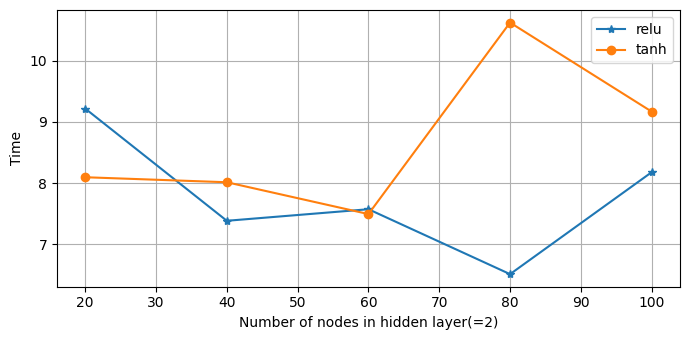

In [228]:
line1 = plt.plot(nodes, time_consum_relu, marker = '*')
line2 = plt.plot(nodes, time_consum_tanh, marker = 'o')
plt.legend(['relu', 'tanh'])
plt.xlabel("Number of nodes in hidden layer(=2)")
plt.ylabel("Time")
plt.grid()
plt.show()

In [232]:
h_layers = [1, 2 ,3 ,4 ,5]
time_consum_relu1 = np.zeros(5)
time_consum_tanh1 = np.zeros(5)
prfs11 = np.zeros(5)
prfs21 = np.zeros(5)
index1 = 0
for h_layer in h_layers:
    time_consum_relu1[index1], prfs11[index1] = train_fuc(h_layer, 20, 'relu')
    time_consum_tanh1[index1], prfs21[index1] = train_fuc(h_layer, 20, 'tanh')
    index1 += 1

In [ ]:
print("prfs11" + prfs11)
print("prfs21" + prfs21)

C:\Users\LEO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


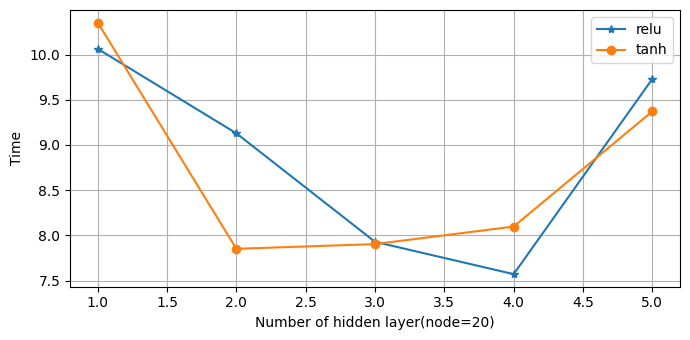

In [233]:
line1_1 = plt.plot(h_layers, time_consum_relu1, marker = '*')
line2_1 = plt.plot(h_layers, time_consum_tanh1, marker = 'o')
plt.legend(['relu', 'tanh'])
plt.xlabel("Number of hidden layer(node=20)")
plt.ylabel("Time")
plt.grid()
plt.show()

In [ ]:
# temp = np.reshape(arr_img[100, :], (14, 14))
# temp = temp.astype(np.int)
# print(temp)

In [ ]:
# from matplotlib import pyplot as plt

# plt.imshow(temp, cmap='gray')
# plt.show()

In [126]:
# from PIL import Image
# # Image.fromarray(temp).show()